# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import logging
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status() 
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | newman
Processing Record 4 of Set 1 | ketchikan
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | misratah
Processing Record 7 of Set 1 | yigo village
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | yung shue wan
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | murudeshwara
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | mili
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | tannum sands
Processing Record 19 of Set 1 | sinop
Processing Record 20 of Set 1 | haiku-pauwela
Processing Record 21 of Set 1 | whitehorse
Processing Record 22 of Set 1 | klyuchi
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.03,95,99,7.50,GS,1738779746
1,port elizabeth,-33.9180,25.5701,20.73,93,30,1.34,ZA,1738779747
2,newman,37.3138,-121.0208,10.58,67,20,3.13,US,1738779749
3,ketchikan,55.3422,-131.6461,0.99,55,0,4.63,US,1738779750
4,anadyr,64.7500,177.4833,-37.72,73,0,4.00,RU,1738779752


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.03,95,99,7.50,GS,1738779746
1,port elizabeth,-33.9180,25.5701,20.73,93,30,1.34,ZA,1738779747
2,newman,37.3138,-121.0208,10.58,67,20,3.13,US,1738779749
3,ketchikan,55.3422,-131.6461,0.99,55,0,4.63,US,1738779750
4,anadyr,64.7500,177.4833,-37.72,73,0,4.00,RU,1738779752


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

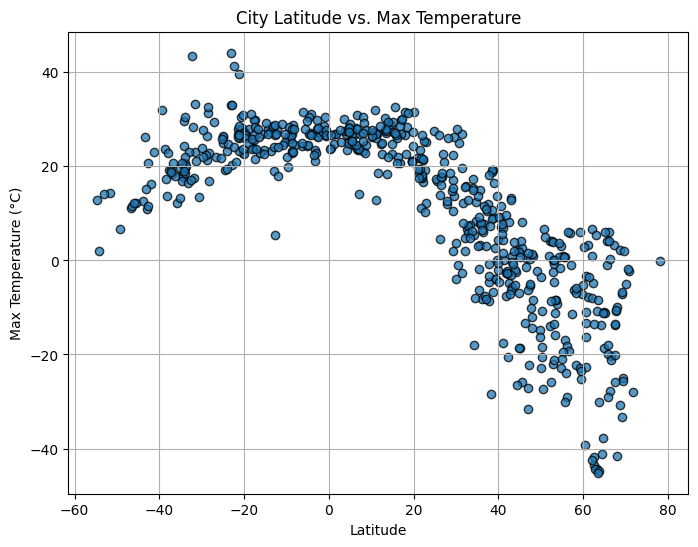

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [10]:
print(city_data_df.columns)


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


#### Latitude Vs. Humidity

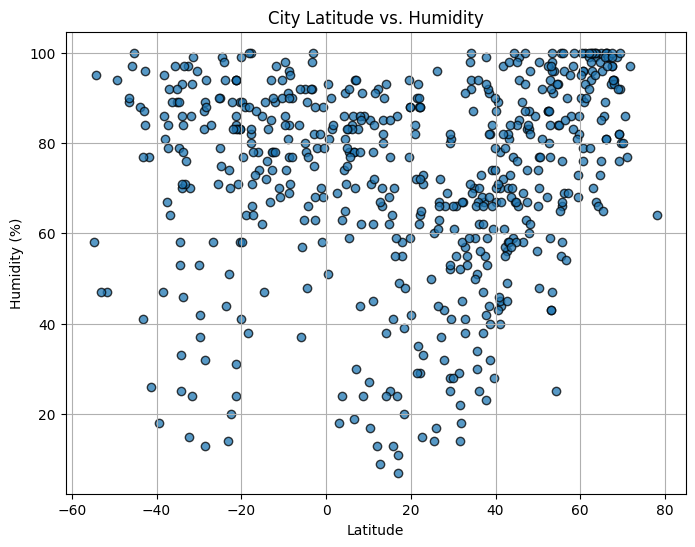

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

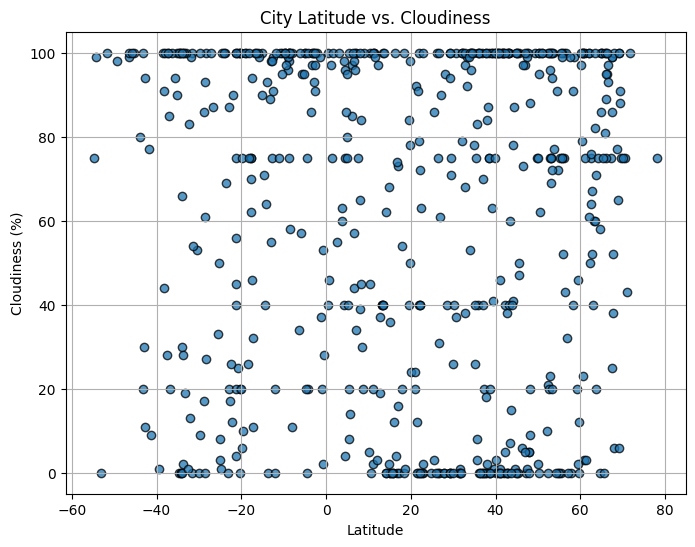

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

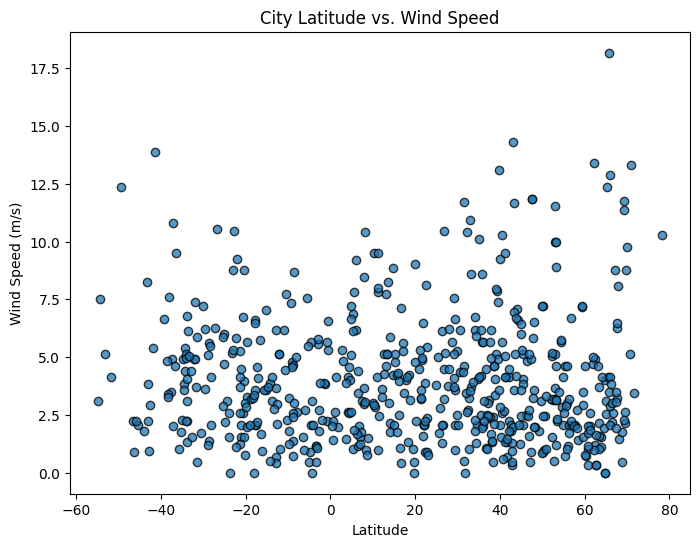

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression_with_equation(x_data, y_data, xlabel, ylabel, title):
    # Reshape data for linear regression
    x_data = x_data.values
    y_data = y_data.values

    # Calculate the slope (m) and intercept (b) using the least squares method
    m, b = np.polyfit(x_data, y_data, 1)

    # Predict values based on the linear model
    y_pred = m * x_data + b

    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolors="black", alpha=0.75, label="Data points")
    plt.plot(x_data, y_pred, color="red", linewidth=2, label="Linear Regression Line")

    # Add the linear regression equation text to the plot
    equation = f"y = {m:.2f}x + {b:.2f}"
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, color="black", 
             verticalalignment="top", horizontalalignment="left", backgroundcolor="white")

    # Labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,newman,37.3138,-121.0208,10.58,67,20,3.13,US,1738779749
3,ketchikan,55.3422,-131.6461,0.99,55,0,4.63,US,1738779750
4,anadyr,64.7500,177.4833,-37.72,73,0,4.00,RU,1738779752
5,misratah,32.3754,15.0925,15.77,67,100,2.72,LY,1738779753
6,yigo village,13.5361,144.8886,27.16,80,100,8.23,GU,1738779754


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.03,95,99,7.50,GS,1738779746
1,port elizabeth,-33.9180,25.5701,20.73,93,30,1.34,ZA,1738779747
7,lebu,-37.6167,-73.6500,19.21,67,28,3.50,CL,1738779755
8,waitangi,-43.9535,-176.5597,12.68,88,80,1.79,NZ,1738779756
10,afaahiti,-17.7500,-149.2833,25.61,82,70,6.62,PF,1738779759


###  Temperature vs. Latitude Linear Regression Plot

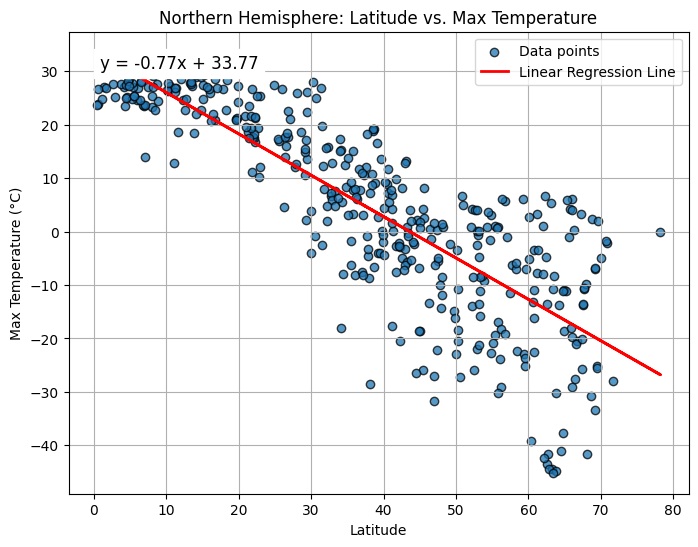

In [17]:
#  plot on Northern Hemisphere
plot_linear_regression_with_equation(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                                     "Latitude", "Max Temperature (°C)", "Northern Hemisphere: Latitude vs. Max Temperature")

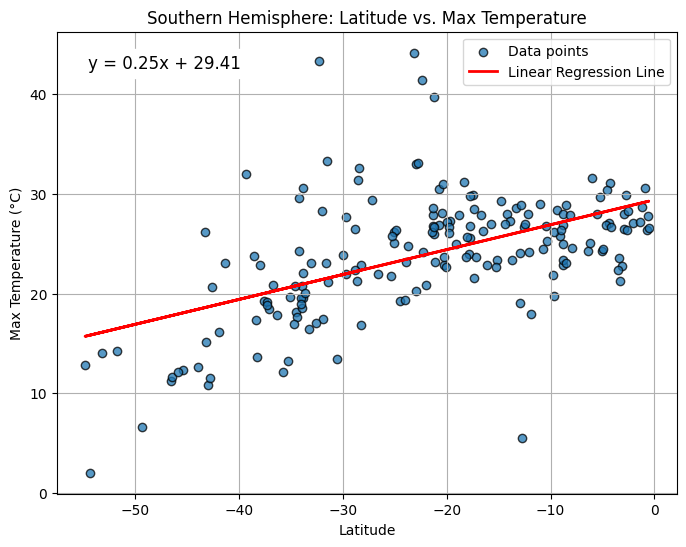

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression_with_equation(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                                     "Latitude", "Max Temperature (°C)", "Southern Hemisphere: Latitude vs. Max Temperature")

**Discussion about the linear relationship:** Temperatures get lower as they get to a higher latitude which makes sense because they are getting further from the equator.

### Humidity vs. Latitude Linear Regression Plot

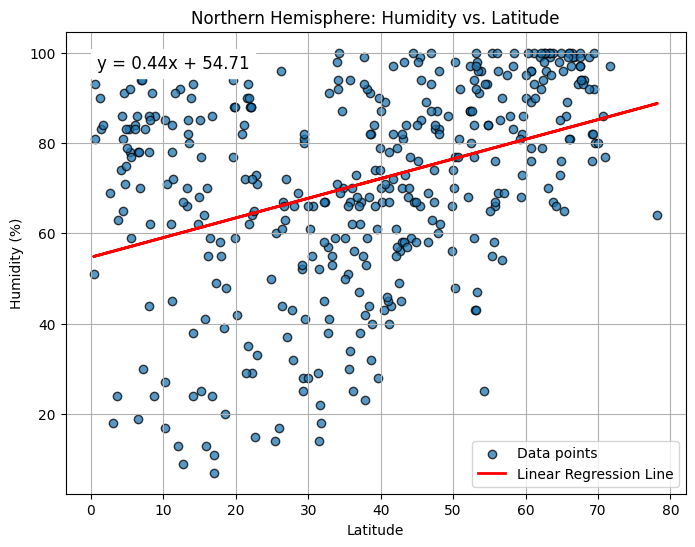

In [19]:
# Northern Hemisphere
plot_linear_regression_with_equation(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                                     "Latitude", "Humidity (%)", "Northern Hemisphere: Humidity vs. Latitude")

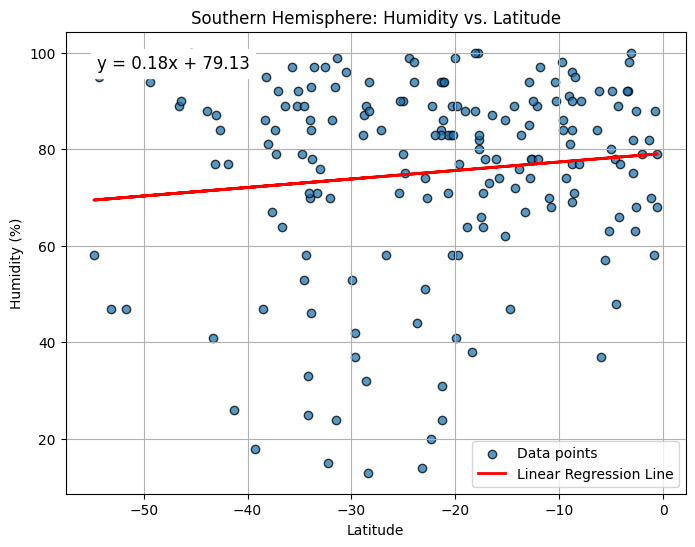

In [20]:
# Southern Hemisphere
plot_linear_regression_with_equation(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                                     "Latitude", "Humidity (%)", "Southern Hemisphere: Humidity vs. Latitude")

**Discussion about the linear relationship:** Humidity seems to have a less defined linear regression as proximity to equator must not have the same affect on humidity as it has on temperature.

### Cloudiness vs. Latitude Linear Regression Plot

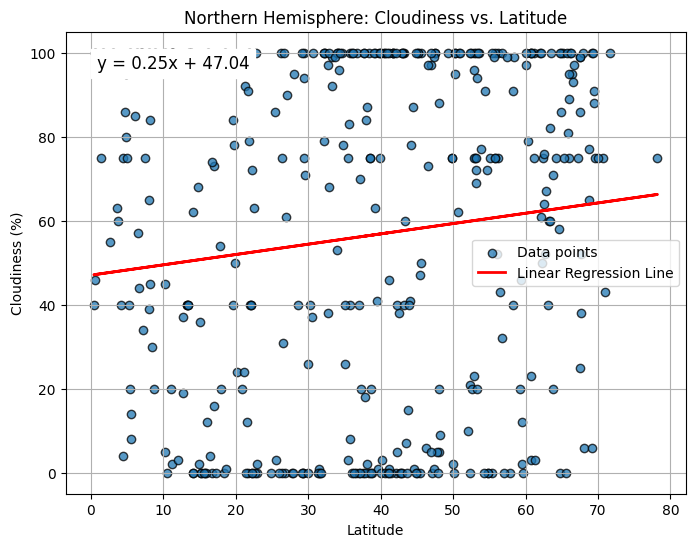

In [22]:
# Northern Hemisphere
plot_linear_regression_with_equation(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                                     "Latitude", "Cloudiness (%)", "Northern Hemisphere: Cloudiness vs. Latitude")

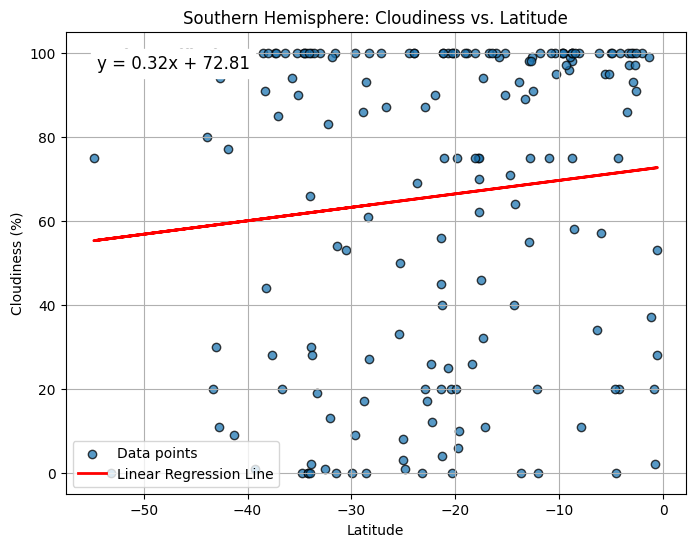

In [23]:
# Southern Hemisphere
plot_linear_regression_with_equation(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                                     "Latitude", "Cloudiness (%)", "Southern Hemisphere: Cloudiness vs. Latitude")

**Discussion about the linear relationship:** There doesn't appear to be a strong linear relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

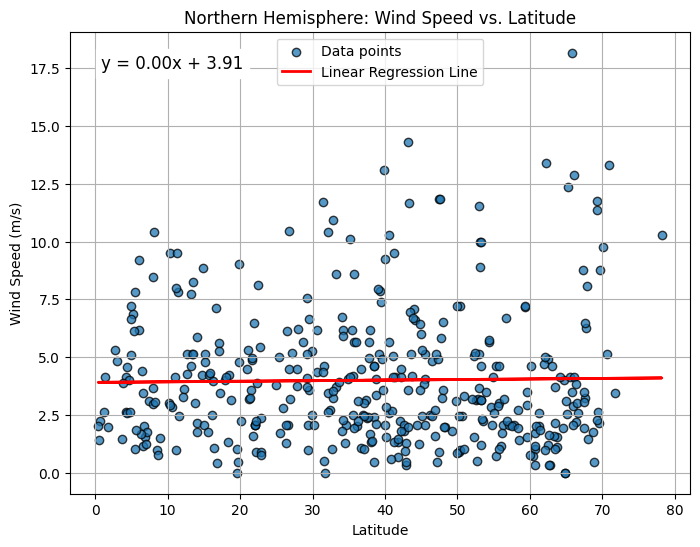

In [25]:
# Northern Hemisphere
plot_linear_regression_with_equation(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                                     "Latitude", "Wind Speed (m/s)", "Northern Hemisphere: Wind Speed vs. Latitude")

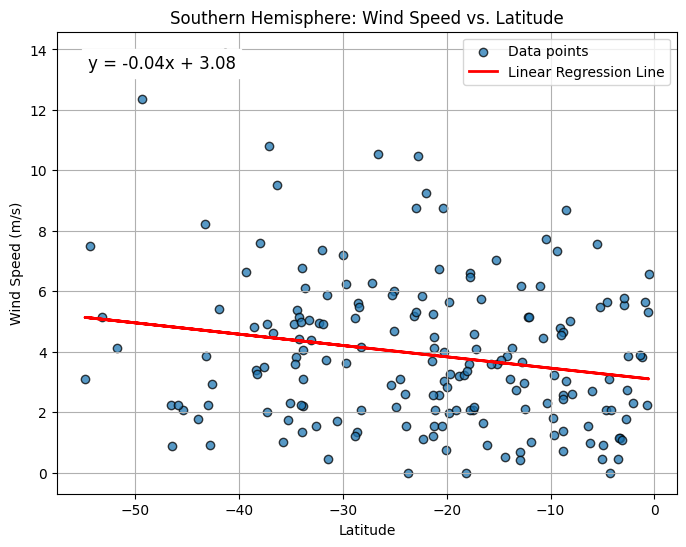

In [26]:
# Southern Hemisphere
plot_linear_regression_with_equation(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                                     "Latitude", "Wind Speed (m/s)", "Southern Hemisphere: Wind Speed vs. Latitude")

**Discussion about the linear relationship:** Data points seem to be evenly distributed across the latitude in both hemispheres and there doesn't appear to be a strong linear relationship.